# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$



## Introduction

To describe the thermodynamical state of a system characterized by N particles interacting with a particular potential, statistical mechanics and simulations are used to study its evolution of its thermodinacal properties. The aim of statistical mechanics is to predict the equilibrium of macroscopic properties of bodies based on their microscopic structure and laws.

A fundamental concept to introduce is the ensemble, which is a collection of hypothetical copies of a physical system, all with the same macroscopic properties but possibly different microscopic states. By studying an ensemble, one can extract the thermodynamic properties of the system.

In this exercise, we describe an isolated system with no energy exchange, and with a constant number of particles and volume. Thus, a microcanonical ensemble is used to represent this system. In this ensemble, studying a single point in phase space is equivalent to considering all possible microstates of the system. According to the postulate of *equal a priori probabilities*, each member of the ensemble is equally likely to occupy any of the accessible microstates. Consequently, the system explores all allowed microstates within the constraints of the ensemble and will reside in any particular configuration with a probability proportional to the number of microstates associated with that configuration.

Simulation is used because it is generally impossible to know the exact configuration of the system in the phase space and, consequently, extract the thermodynamical properties directly. However, it is possible to start with initial thermodynamic properties and a beginning configuration, derive microscopic particle properties, and then let the system evolve.
 

### Verlet's algorithm
In this excercise of MD it is used Verlet' algorithm  for the evolution of the properties of particle (position, velocity, acceleration).
It consists in a third order “Taylor expansion” algorithm and it is derived form the two Tailor expansion:

$$ \vec{r}(t+ \delta t) = \vec{r}(t)  + \delta t\vec{v} +\frac{1}{2} \delta t^2 \vec{a}(t) + \frac{1}{3!}\delta t \dot{\vec{a}} (t) + O(\delta t^4)  $$

and

$$ \vec{r}(t- \delta t) = \vec{r}(t)  - \delta t\vec{v} +\frac{1}{2} \delta t^2 \vec{a}(t) - \frac{1}{3!}\delta t \dot{\vec{a}} (t) + O(\delta t^4)  $$

from which you can achieved position, not using velocity:

$$ \vec{r}(t+ \delta t) = 2\vec{r}(t)  - \vec{r}(t- \delta t) + \delta t^2 \vec{a}(t) $$

$$ \vec{v}(t) \sim \frac{\vec{r}(t+ \delta t)  - \vec{r}(t- \delta t)}  {2 \delta t}  $$

Taking previous position and velocities from configuration obtained in a previous simulation or initialize velocity with Maxwell-Boltzmann distribution and position from a file in `../INPUT/{PHASE}/CONFIG/config.in` where {PHASE} is the phase (gas,liquid, solid) of the system desired to simulate


This method:
- is not self-starting, the initial position is not necessary to begin the calculation.
- it's a time reversible method

Consequently , knowing position and acceleration, exctracting from the force and the potential of interaction chosen is possible to predict position and velocity of the particles.

### Periodic Boundary condition
In this program, periodic boundary conditions are set in order to reduce the computational load permitting to concentrate only on a small part of the system. This is a widely used method to simplify the treatment of the problem. Another aspect developed is the introduction of a small perturbation with a cut-off radius `R_CUT` to simplify the calculation. This technique is efficient because the Lennard-Jones potential used for this exercise is short-ranged.

### Using reduce units:
In simulations it is often convenient to express quantities such as temperature, density, pressure etc. in reduced units. This means that we choose a convenient unit of energy, length and mass and then express all other quantities in terms of these basic units. The most important reasonto introduce reduced units is that(infinitely) many combinations of r, T, e and s all correspond to the same state in reduced units. This is the law of corresponding states.

In this exercise we expressed every properties in unit:
- lenght  $\sigma$
- energy $\epsilon$
- mass m

from this it is possible to deduce the other physical quantities like:

- time $t^* = t/ \sigma\sqrt{m/\epsilon}$
- temperature $ T^* = T k_B/\epsilon$
- distance $ r^* = r/\sigma $
- density $\rho^* = N*\sigma^3/V$
- volume $V^* = V/\sigma^3 $

and in particular

Lennard Jones potential = $v^* = 4 [(\frac{1}{r^*})^{12}-(\frac{1}{r^*})^6 ]$

For Exercise is necessary to implemented Pression $P^*$, that could be calculated by using viral theorem, written in the form of generalized equipartition:

$$P^* = \rho^* T^* + \left\langle\frac{48.0}{3V^*} \left( \sum_{i=1}^{N-1} \sum_{i<j=1}^{N} \left( \frac{1.0}{(r^*)^{12}} - \frac{0.5}{(r^*)^{6}} \right) \right)\right\rangle$$







Here, I put part of the code implemented: 
```cpp
    double pression_temp = 0.0;
    for (int i=0; i<_npart-1; i++){
        for (int j=i+1; j<_npart; j++){
            if(dr < _r_cut){
          // PRESSURE ... TO BE FIXED IN EXERCISE 4 
              if (_measure_pressure) pression_temp += 1.0/pow(dr,12) - 0.5/pow(dr,6); // PRESSURE
            }
        }
    }
    [...]
   
   // PRESSURE //////////////////////////////////////////////////////////////////
       if (_measure_temp and _measure_pressure) _measurement(_index_pressure) = _rho*_measurement(_index_temp)+ (48.0/(3.0 *     _volume))*pression_temp/(double)(_npart);
    
```

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

## Information about the code:
To set the simulation it is utilized an input file where program extract the information to prepare simulation. In this file there are different information:

| Parameter       | Value |
|-----------------| ------|
| SIMULATION_TYPE | 0     |
| RESTART         | 0     |
| TEMP            | 0.95  |
| NPART           | 108   |
| RHO             | 0.05  |
| R_CUT           | 5.0   |
| DELTA           | 0.0005|
| NBLOCKS         | 120   |
| NSTEPS          | 2000  |
| ENDINPUT        |       |



where `SIMULATION_TYPE` is the type of simulation (in this case Lennard Jones simulation); `RESTART` is necessary to understand where take and initialize velocity; `TEMP` is the initial temperature; `NPART` number particles, `RHO ` density of particle, `DELTA` delta of time between two step, `NBLOCKS` number of blocks ,`NSTEPS`number of steps inside one block.

In my exercise I create two different input data file: the first one needed for equilibration `./INPUT/PHASE/input_equilibration.dat` and the second one for evolution `./INPUT/PHASE/input.dat`

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

### Programm organization:
In the programm the user can chose between writing by terminal (written in `READ.ME`) equilibration mode and evolution mode and the phase of the system between GAS/LIQUID and SOLID. For each phase a directory is created where are set input file for **equilibration** and **evolution**.



## Equilibration 
After preparing the system, I wrote programm to evolve the system for NSTEPS steps within NBLOCKS blocks. At the end of this process, if the temperature is near the desired value (in fig as dash orange line), the function `system.cpp\equilibratione_rough()` or `system.cpp\equilibratione_fine()` adjusts the initial temperature by modifying `input_equilibration.dat` and restarts the simulation. There are two types of equilibration: a rough equilibration to approximate the appropriate temperature range, and a fine equilibration for more precise adjustments, the best one is represented by **red line** in the graphics. The latter also modifies input.dat to set the optimal temperature for the evolution phase.

The equilibration program runs until the temperature stabilizes, indicating that the system has reached equilibrium. A threshold number of blocks is defined for each phase to ensure proper equilibration (in fig as dash blue line)

This equilibration process is necessary because the system, when initially prepared, is not necessarily in its equilibrium state. Therefore, the system must evolve to reach a more stable and accurate state.


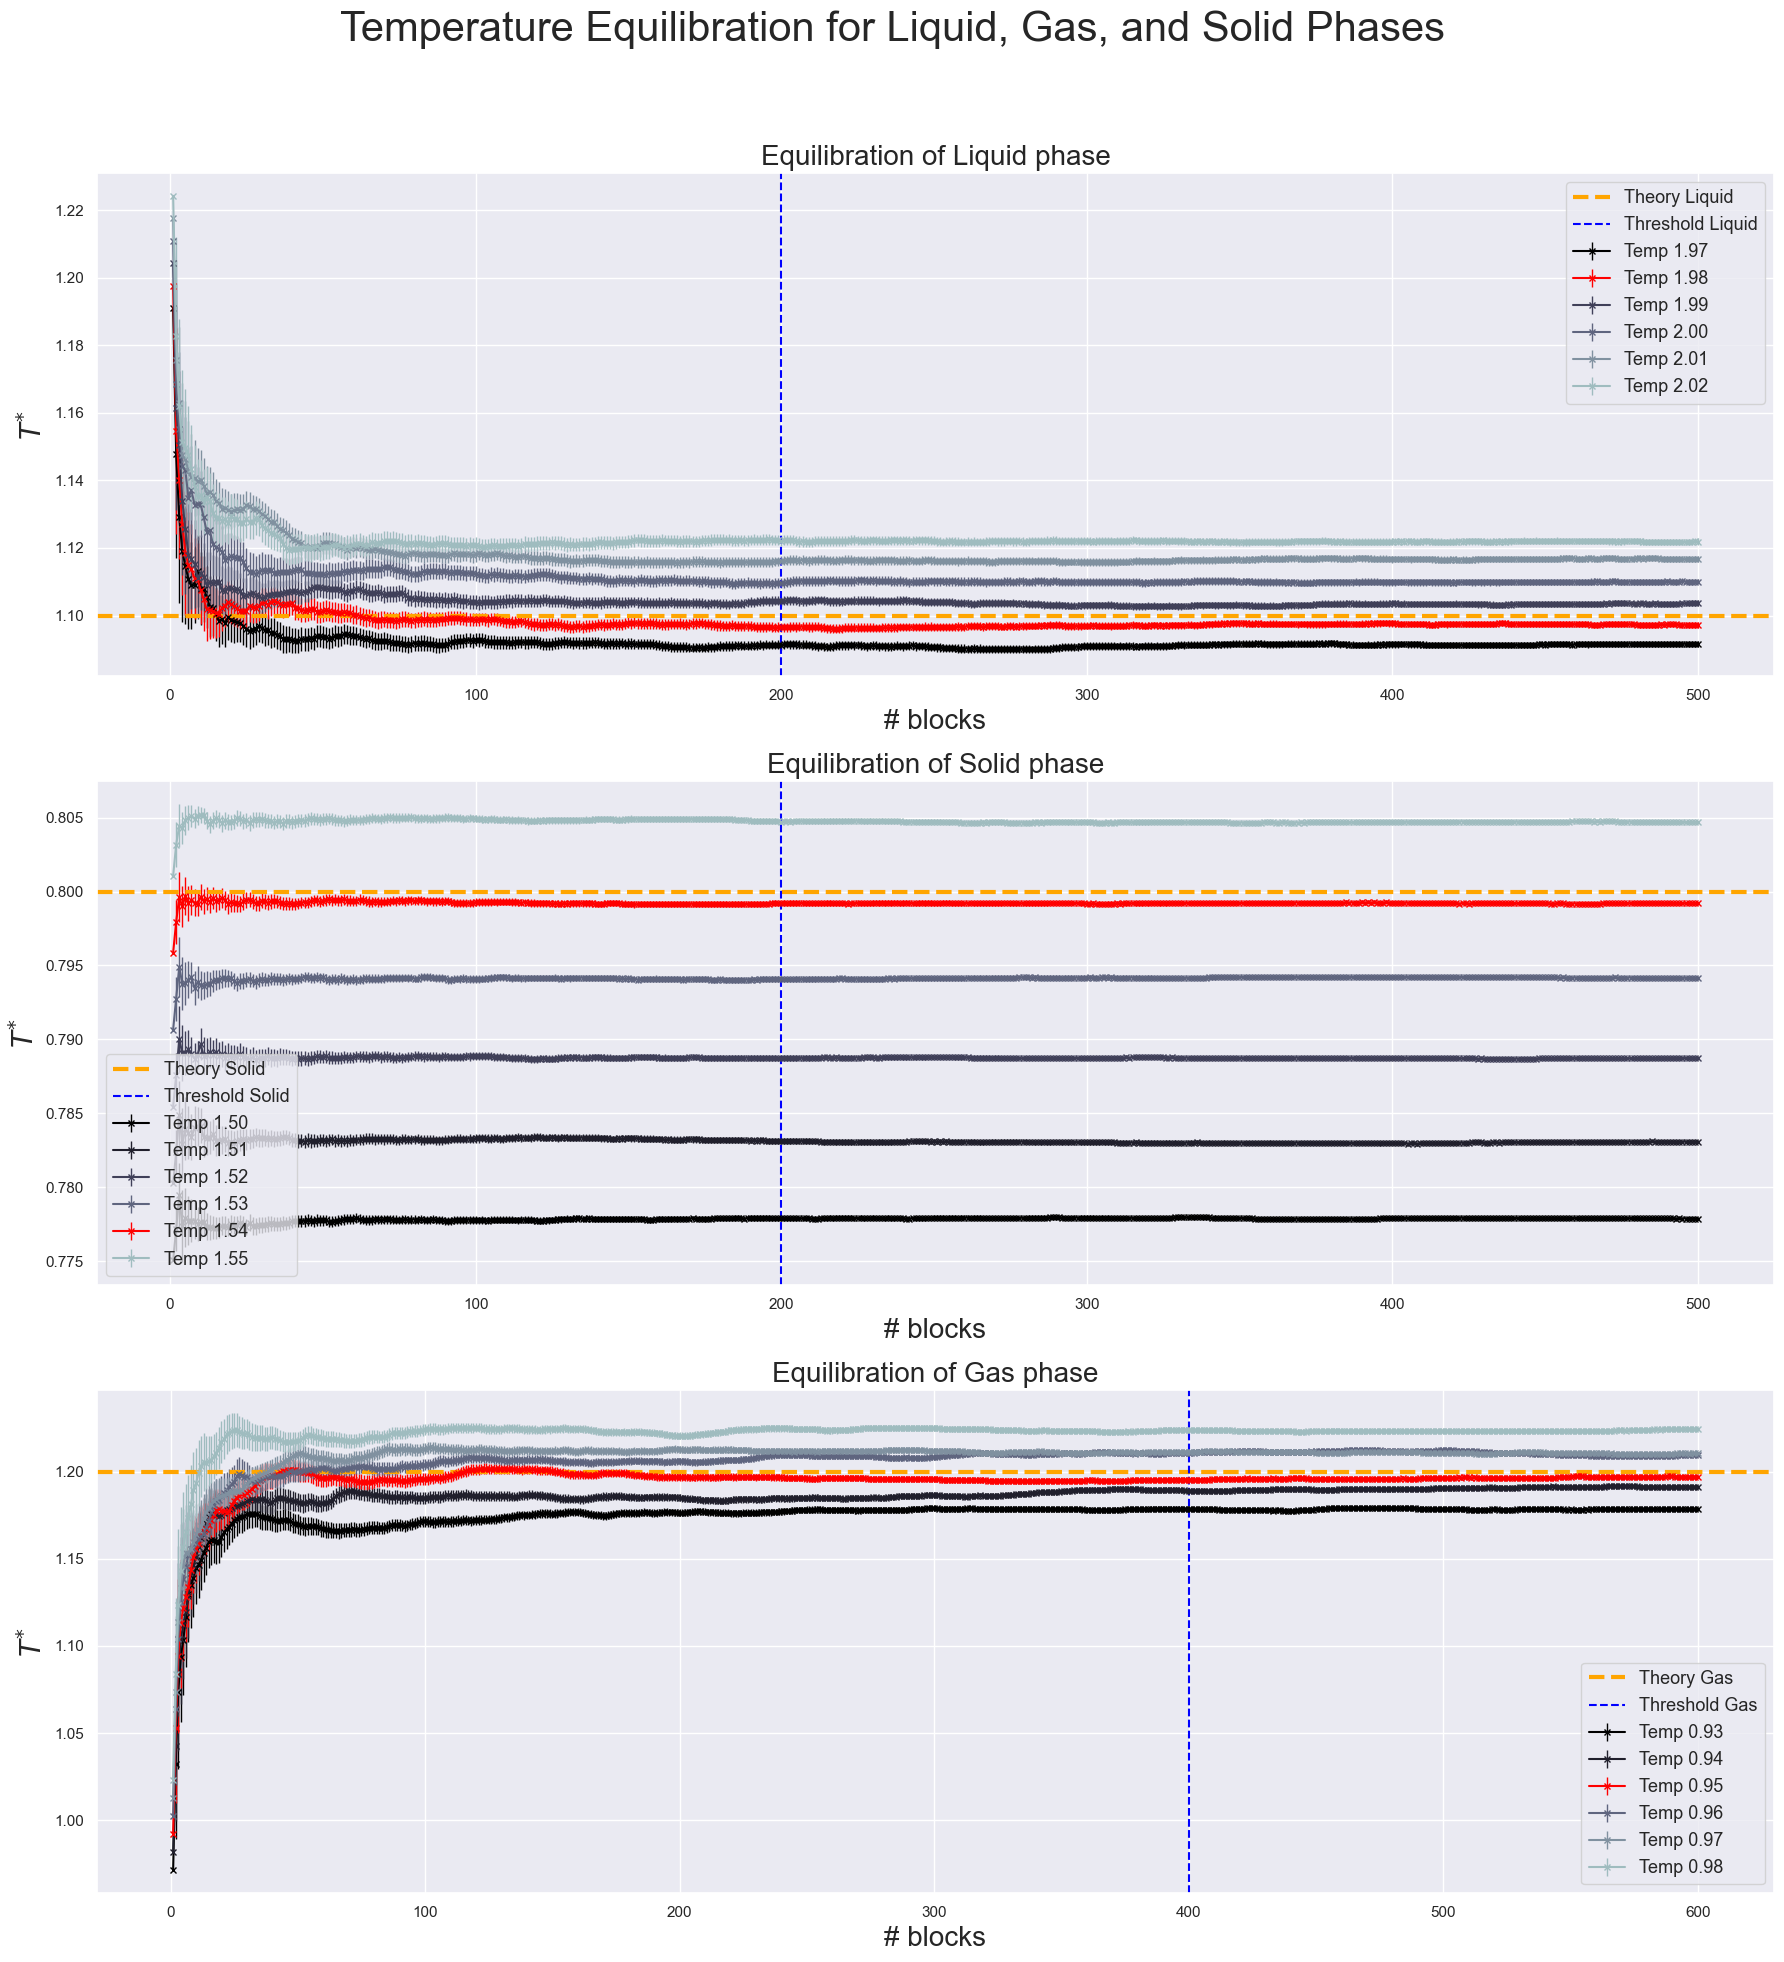

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style='darkgrid')


# Specifiche delle colonne del file
colspecs = [(0, 12), (12, 24), (24, 36), (36, 48)]

# Creazione delle sottotrame
fig, axs = plt.subplots(3, 1, figsize=(18, 20))
colormap = plt.get_cmap('bone')

phases = ['Liquid', 'Solid', 'Gas']
highlight_temps = {'Liquid': 1.98,'Solid': 1.54, 'Gas': 0.95}
highlight_color = 'red'

theory_lines = [1.1, 0.8, 1.2]
thresholds = [200, 200, 400]

# Ciclo per ogni temperatura
for i in np.arange(0, 6):
    temps = {
        'Liquid': 1.97 + 0.01 * i,
        'Gas': 0.93 + 0.01 * i,
        'Solid': 1.50 + 0.01 * i
    }

    paths = {
        'Liquid': f'NSL_SIMULATOR/OUTPUT/LIQUID/EQUILIBRATION/temperature_{temps["Liquid"]:.2f}.dat',
        'Gas': f'NSL_SIMULATOR/OUTPUT/GAS/EQUILIBRATION/temperature_{temps["Gas"]:.2f}.dat',
        'Solid': f'NSL_SIMULATOR/OUTPUT/SOLID/EQUILIBRATION/temperature_{temps["Solid"]:.2f}.dat'
    }

    for j, phase in enumerate(phases):
        df = pd.read_fwf(paths[phase], colspecs=colspecs, header=None, skiprows=1)
        df.columns = ['blk', 'average', 'sum_average_per_blk', 'error']

        if np.isclose(temps[phase], highlight_temps[phase]):
            color = highlight_color
        else:
            color = colormap(i / 7)
        
        axs[j].errorbar(df['blk'], df['sum_average_per_blk'], yerr=df['error'],
                        label=f'Temp {temps[phase]:.2f}',
                        color=color, linestyle='-', marker='x', mfc=color, mec=color,
                        ms=4, elinewidth=1)

        axs[j].set_title(f'Equilibration of {phase} phase', fontsize = 20)
        axs[j].set_xlabel('# blocks',fontsize = 20)
        axs[j].set_ylabel('$T^{*}$', fontsize = 20)
        axs[j].grid(True)

 
# Aggiungere linee di riferimento e leggende


for j, phase in enumerate(phases):
    axs[j].axhline(theory_lines[j], ls='--', c='orange', label=f'Theory {phase}', lw=3)
    axs[j].axvline(thresholds[j], color='blue', linestyle='--', label=f'Threshold {phase}')
    axs[j].legend(loc = 0 , fontsize = 13)
    

# Aggiungere un titolo complessivo alla figura
fig.suptitle('Temperature Equilibration for Liquid, Gas, and Solid Phases', fontsize=30, x=0.5, horizontalalignment='center')

# Aggiustare il layout per evitare sovrapposizioni
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Comment to equilibration
In this grapich are shown the the equilibration of system for different phase, Liquid, Solid and Gas. It is possible to note that  Liquid and Solid reach their equilibrium in less number of block, setting and seeing threshold.

## Evolution
Found the best temperature in order to see the desired temperature. I let the program evolve until equilibrium block threshold and I register 120 blocks after all the quantities requested by exercise.
Solid phase  equilibration fluctuates less than the other phase, that's probably because the periodic simulated cristalline structure of the is more stable.
A second observation is that gas temperature is less that the temperature desired whereas the other need a temperature higher. this probababily because particle of gas, that are more free to moving caused by a minor density then to become hotter the system. This could explain the behaviour of the other phase, because happen the opposite.

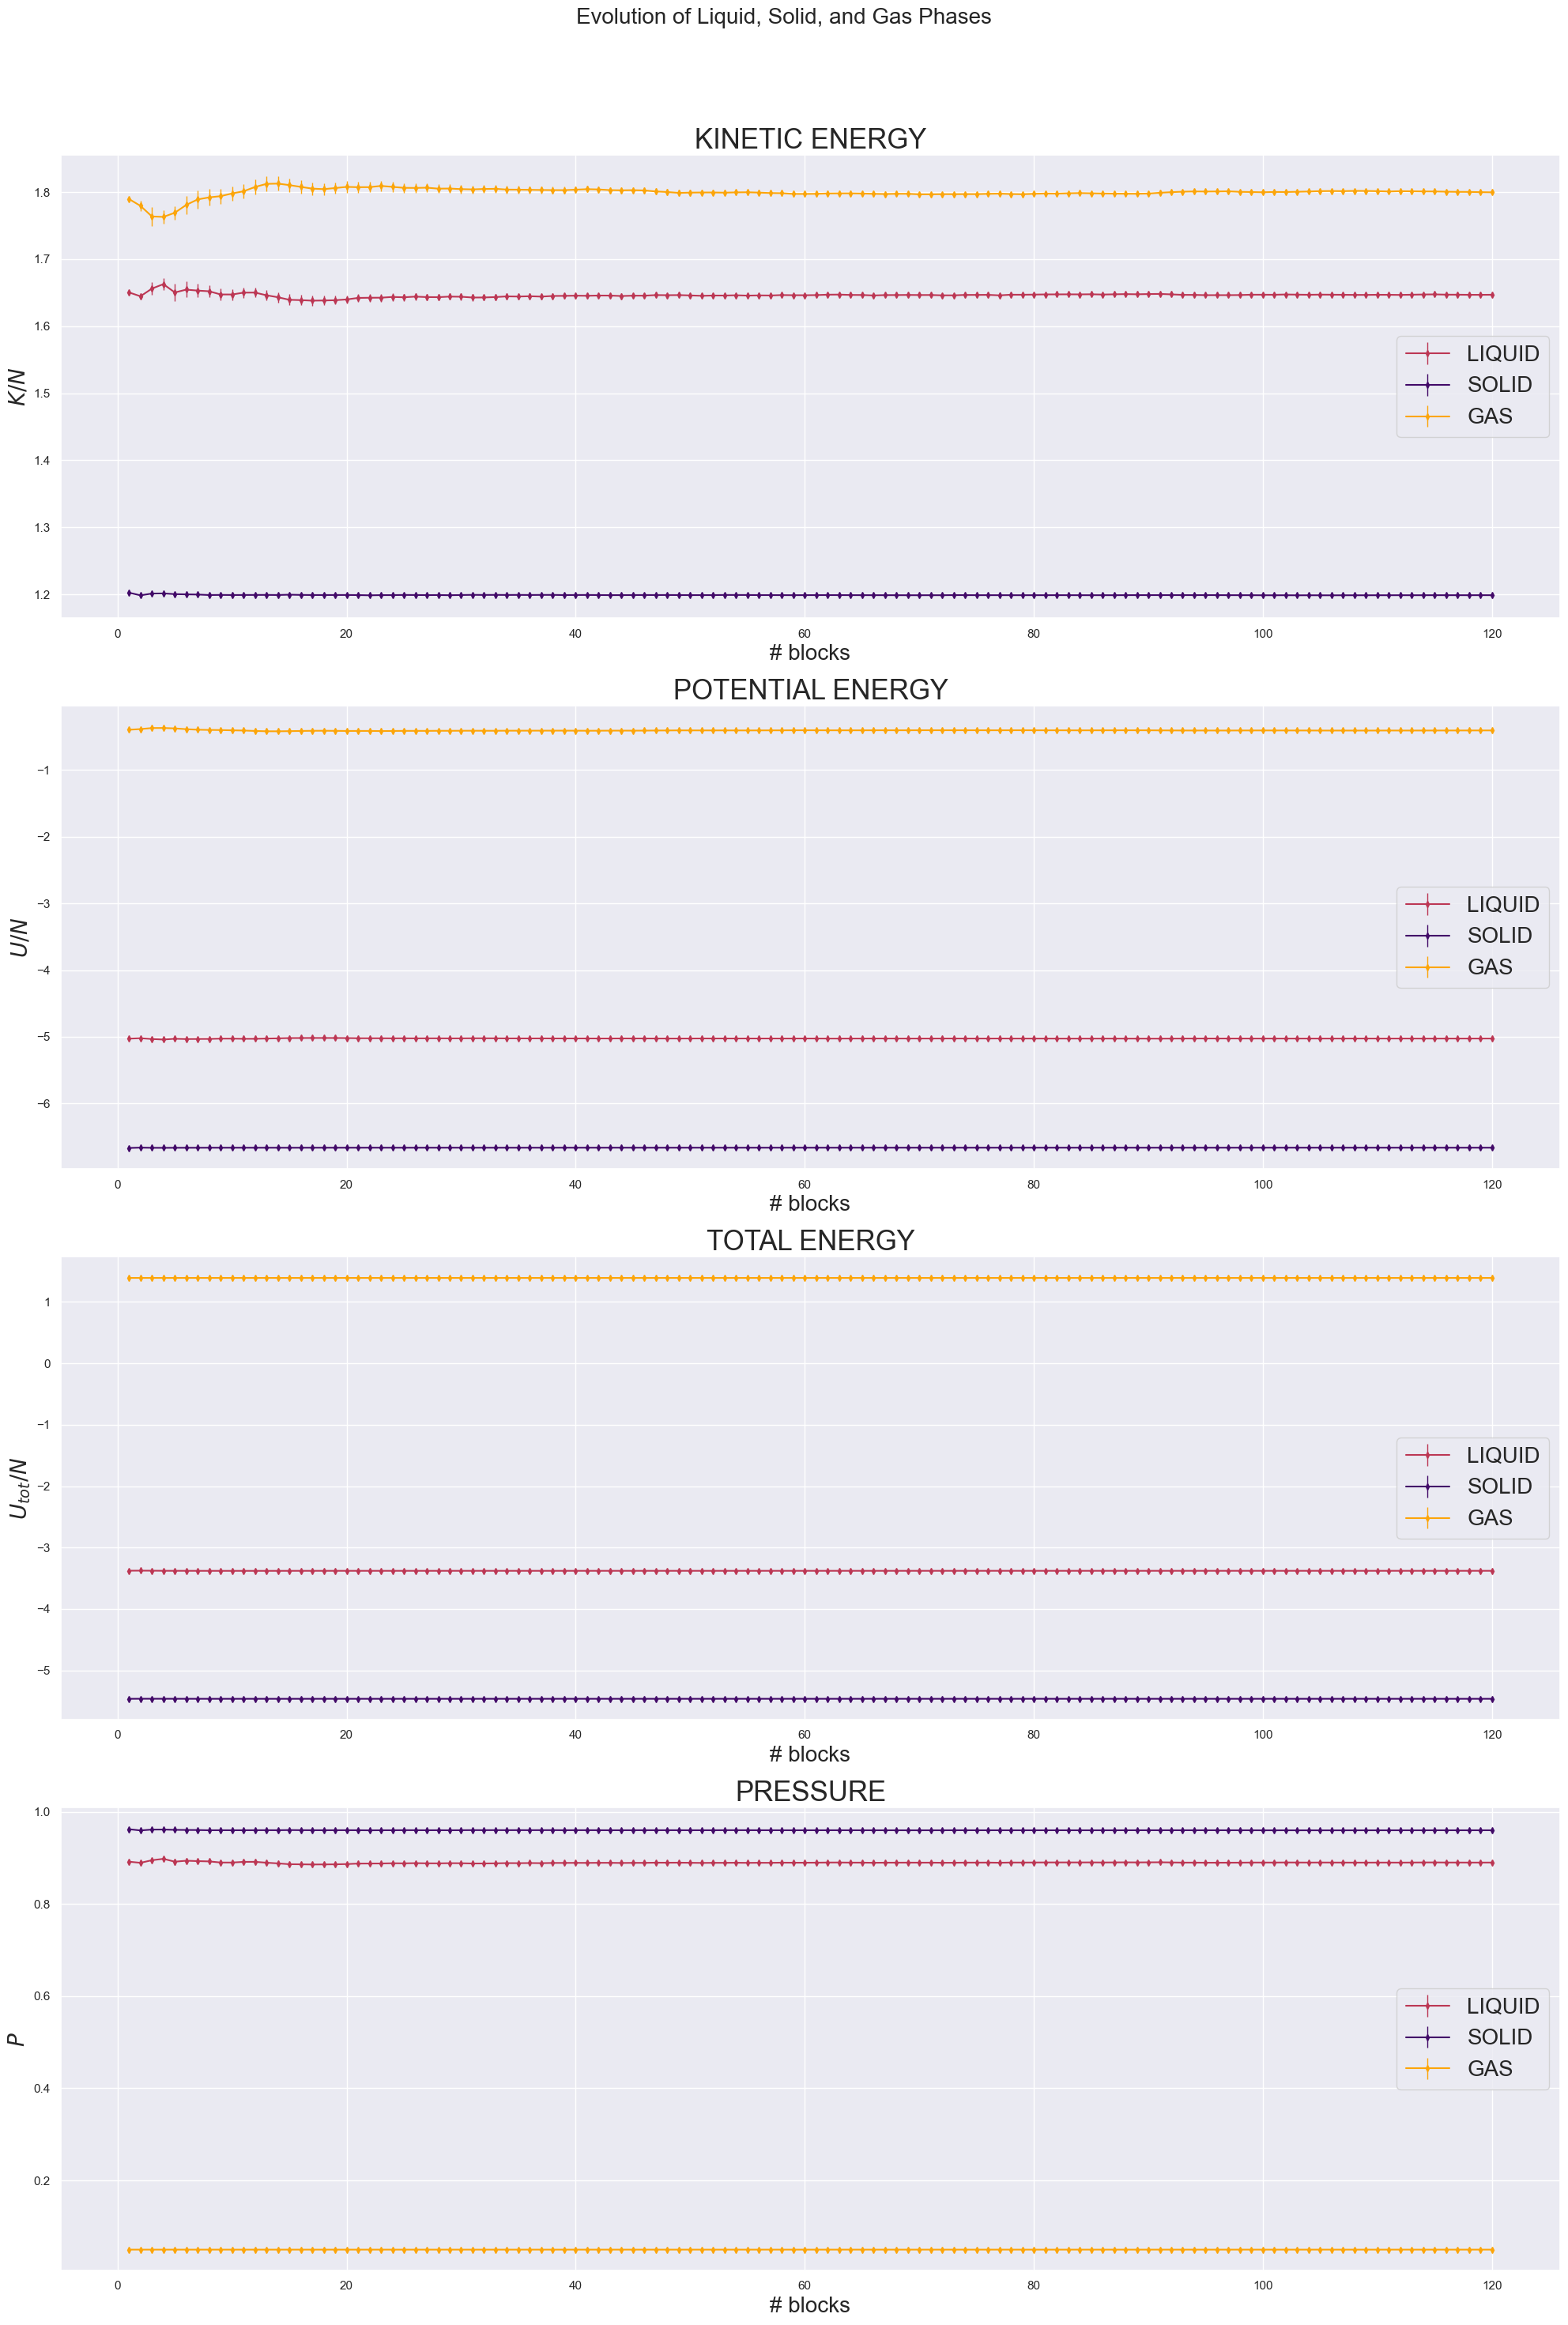

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style= 'darkgrid')

# Specifiche delle colonne del file
colspecs = [(0, 12), (12, 24), (24, 36), (36, 48)]

phases = ['LIQUID', 'SOLID', 'GAS']
energies = ['kinetic_energy', 'potential_energy', 'total_energy', 'pressure']
titles = ['KINETIC ENERGY', 'POTENTIAL ENERGY', 'TOTAL ENERGY', 'PRESSURE']
y_labels = ['$K/N$', '$U/N$', '$U_{tot}/N$', '$P$']

# Configura la griglia di sottotrame
fig, axs = plt.subplots(4, 1, figsize=(20, 30))  # Crea una griglia di 1x5
fig.suptitle('Evolution of Liquid, Solid, and Gas Phases', fontsize=20)  # Titolo principale
colormap = plt.get_cmap('inferno')

# Ciclo esterno per le fasi
for phase in phases:
    # Ciclo interno per le energie
    for idx, energy in enumerate(energies):
        path = f'NSL_SIMULATOR/OUTPUT/{phase}/{energy}.dat'
        df = pd.read_fwf(path, colspecs=colspecs, header=None, skiprows=1)
        df.columns = ['blk', 'average', 'sum_average_per_blk', 'error']

        color = colormap(0.5 if phase == 'LIQUID' else (0.2 if phase == 'SOLID' else 0.8))

        axs[idx].errorbar(df['blk'], df['sum_average_per_blk'], yerr=df['error'],
                          label=f'{phase}', color=color,
                          linestyle='-', marker='d', mfc=color, mec=color, ms=4, elinewidth=1)

        axs[idx].set_title(titles[idx],fontsize = 25)
        axs[idx].set_xlabel('# blocks',fontsize = 20)
        axs[idx].set_ylabel(y_labels[idx], fontsize = 20)
        axs[idx].grid(True)
        axs[idx].legend( fontsize = 20)

# Aggiustare il layout per evitare sovrapposizioni
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Discussion of Result
In these graphs, several key aspects can be observed:

- First of all, once the system reaches equilibrium, it remains constant. This is evident from the stability of the system over the number of blocks.
It is observed that the kinetic energy of the solid phase is lower than that of the gas phase. This is expected because, in the solid phase, particles are bound together.
- Similarly, the potential energy in the solid phase is more negative, which is also reasonable due to the stronger particle interactions in this phase.
- In the total energy graph, we can see which contribution dominates in each phase: kinetic energy dominates in the gas phase, while potential energy dominates in the liquid and solid phases.
- The opposite behavior is observed in the pressure graph. This is because the simulation maintains the same number of particles in the system, but the phase influences the size of the cubic region where the particles are located. The cubic regions have different side lengths but contain the same number of particles, resulting in varying potential energies. Consequently, a larger cubic region corresponds to different pressure values due to the change in volume: `SIDE_GAS = 12.9266`, `SIDE_LIQUID = 5.1299`, and `SIDE_SOLID = 4.6132`.